In [1]:
import warnings
warnings.filterwarnings(action='ignore')
from preamble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

## 결정 트리의 앙상블
### 랜덤 포레스트 구축
### 랜덤 포레스트 분석

In [2]:
X,y = make_moons(n_samples = 100,noise = 0.25,random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state = 42)

forest = RandomForestClassifier(n_estimators = 5,random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


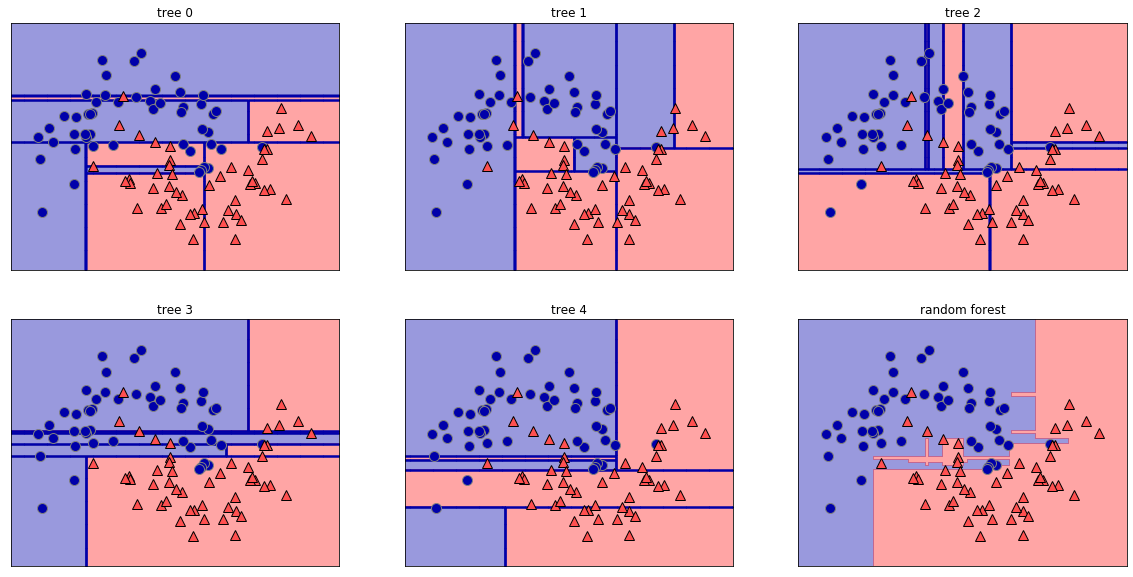

In [6]:
fig, axes = plt.subplots(2,3,figsize = (20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax = ax)
    
mglearn.plots.plot_2d_separator(forest,X,fill = True,ax = axes[-1,-1],alpha = .4)
axes[-1,-1].set_title("random forest")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

forest = RandomForestClassifier(n_estimators = 100,random_state = 0)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


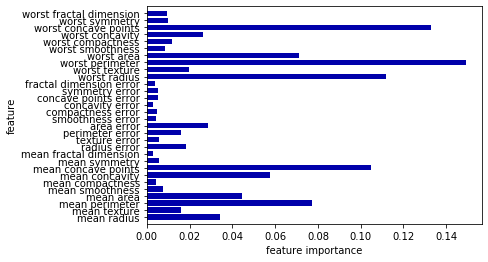

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(forest)

In [11]:
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [12]:
gbrt = GradientBoostingClassifier(random_state = 0,max_depth = 1)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.958


In [13]:
gbrt = GradientBoostingClassifier(random_state = 0,learning_rate = 0.01)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.937


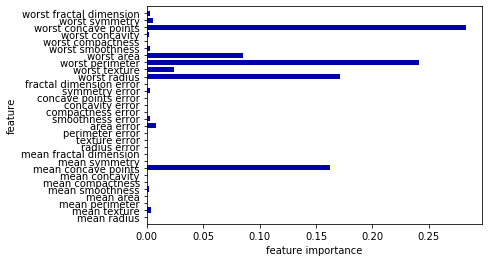

In [14]:
gbrt = GradientBoostingClassifier(random_state = 0,max_depth = 1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)